In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
 
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier

import os

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
 
import joblib


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,f1_score

In [50]:
Path_data = os.path.join(os.getcwd(), '..', 'data', 'Churn_Modelling.csv')

df = pd.read_csv(Path_data) 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Dataset Understanding

In [51]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


In [52]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [53]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis (EDA)

C:\Users\Dos Enter\AppData\Local\Temp\ipykernel_13316\3034021738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


<Axes: xlabel='Exited', ylabel='count'>

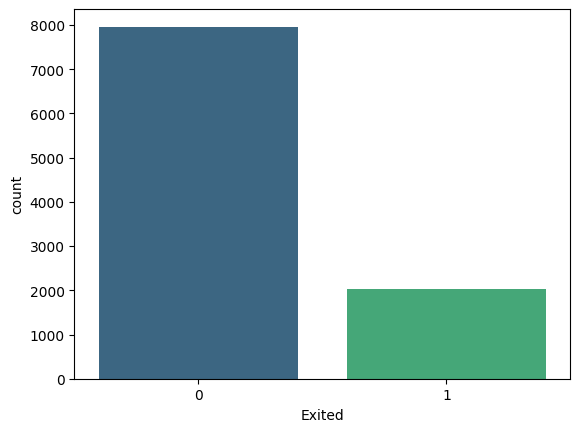

In [54]:
sns.countplot(x='Exited', data=df, palette='viridis')

<Axes: xlabel='Exited', ylabel='Balance'>

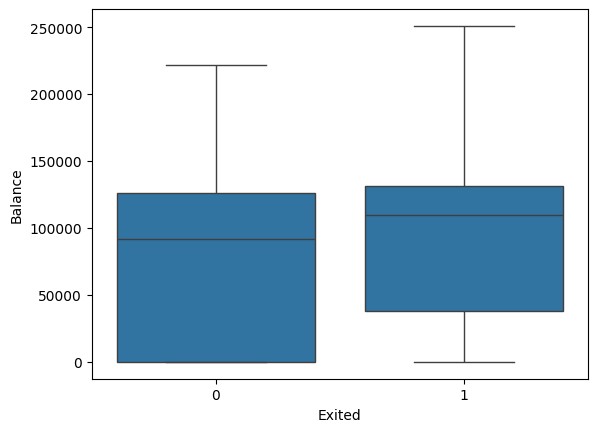

In [55]:
sns.boxplot(x='Exited', y='Balance', data=df)

In [56]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
x = df.drop('Exited', axis=1)
y = df['Exited']

# Train-Test Split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Data Cleaning 



In [102]:
categorical_cols = ["Gender", "Geography"]
numeric_cols = X_train.drop(columns=categorical_cols).columns




In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])


param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 5, 10]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_





# Evaluation

In [ ]:


y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Train F1:", f1_score(y_train, y_pred_train))
print("Test F1:", f1_score(y_test, y_pred_test))

Train F1: 1.0
Test F1: 0.5864197530864198


In [124]:
Path_model = os.path.join(os.getcwd(), '..', 'models')


In [118]:
joblib.dump(best_model,os.path.join(Path_model,  "final_pipeline.pkl"))

['d:\\Lec\\Lec\\1\\one project\\ML-Application\\src\\notebooks\\..\\models\\final_pipeline.pkl']

'd:\\Lec\\Lec\\1\\one project\\ML-Application\\src\\notebooks\\..\\models'

# try model

In [116]:
new_data = X_train.head(1)
new_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.0,1,1,0,159475.08


In [122]:
prediction = loaded_model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1]
